In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
titan = pd.read_csv("Titanic-Dataset.csv")
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titan.drop(["PassengerId","Name","Ticket","Cabin"], axis=1, inplace=True)
titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
titan['Embarked'].fillna(titan['Embarked'].mode()[0],inplace=True)
titan['Age'].fillna(titan['Age'].mean(), inplace=True)
titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [6]:
titan.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
titan.select_dtypes(include="object").columns

Index(['Sex', 'Embarked'], dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
enc_sex = LabelEncoder()
enc_emb = LabelEncoder()

titan["Sex"] = enc_sex.fit_transform(titan["Sex"])
titan["Embarked"] = enc_sex.fit_transform(titan["Embarked"])

In [9]:
#  importing picle to make seprate file for Sex And Embarked
import pickle

In [10]:
with open("Sex_Encoder.pkl","wb") as f:
    pickle.dump(enc_sex,f)
with open("Embarked_Encoder.pkl","wb") as f:
    pickle.dump(enc_emb,f)

In [11]:
titan.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [12]:
X = titan.iloc[:,1:]
y = titan.iloc[:,0]

In [13]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,
                                                  y,
                                                  test_size=0.3)

In [16]:
X_train.shape,y_train.shape

((623, 7), (623,))

In [17]:
X_test.shape,y_test.shape

((268, 7), (268,))

In [18]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
y_pred = log_model.predict(X_test)
y_pred[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [21]:
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"F1 Score : {f1_score(y_test,y_pred)}")

Accuracy Score : 0.7574626865671642
Precision Score : 0.6893203883495146
Recall Score : 0.6826923076923077
F1 Score : 0.6859903381642513


In [22]:
confusion_matrix(y_test,y_pred)

array([[132,  32],
       [ 33,  71]])

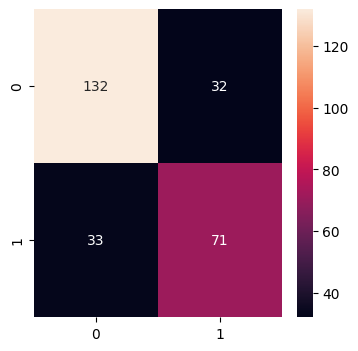

In [23]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt = ".0f")
plt.show()

In [25]:
arr = np.array([[3, 1, 22.0, 1, 0, 7.25, 2]])  # fill missing first element

pred = log_model.predict(arr)
print(pred)


[0]


In [26]:
Total_data = 142 + 29+ 28+  69
True_value = 142 + 69
accuracy = (True_value/Total_data)*100
print(accuracy)
print(100-accuracy)

78.73134328358209
21.268656716417908


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       164
           1       0.69      0.68      0.69       104

    accuracy                           0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268

